<a href="https://colab.research.google.com/github/josearangos/PDI/blob/Colab/Colab_Class/Espacios_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image

# Espacios de colores

# Descripción

## Espacios de colores
 
En esta clase se exploro algunos modelos de representación del color

- Modelo cordenadas formato RGB
- Modelo cordenadas HSV
- Modelo cordenadas LAB o CIE


### Actividad

En esta clase se analiza una imagen de un carro(entrada) y se muestran sus componentes convertidos a diferentes formatos en imagenes
(salida) para localizar cual nos arroja mayor claridad y utilidad a la hora de encontrar la placa. dado como resultado
una imagen en donde resalta la placa.

In [0]:
! wget https://github.com/josearangos/PDI/raw/Colab/Resources/Image/carro.jpg

--2020-04-02 23:28:21--  https://github.com/josearangos/PDI/raw/Colab/Resources/Image/carro.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/josearangos/PDI/Colab/Resources/Image/carro.jpg [following]
--2020-04-02 23:28:22--  https://raw.githubusercontent.com/josearangos/PDI/Colab/Resources/Image/carro.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3295490 (3.1M) [image/jpeg]
Saving to: ‘carro.jpg’

carro.jpg           100%[===================>]   3.14M  --.-KB/s    in 0.06s   

2020-04-02 23:28:22 (52.1 MB/s) - ‘carro.jpg’ saved [3295490/3295490]



## PARTE 1 EXPLORACIÓN DE LA IMAGEN EN DIFERENTES MODELOS


In [0]:

# Con esta función normalizamos la imagen y la cambiamos de 3 a dos dimensiones
def chori(a):
    fil, col, cap = a.shape  # Extraemos sus dimensiones y las guardamos en variables separadas

    cv2.normalize(a, None, 0, 255, cv2.NORM_MINMAX)  # Normalizamos la imagen con Z-scored
    # Cambiamos las dimensiones de la imagen (de tres a dos dimensiones)
    # Order= f es para que nos muestre los ejes de las imagenes uno por uno en vez de uno por columna
    a = np.reshape(a, (fil, col * cap),order='f')
    return a

# Con esta función obtenemos las componentes de la imagen y las convertimos a diferentes formatos de imagen
def componentes(a,cmyk_image_resize):
    a1_chori = chori(a) #RGB
    """
    Modelo cordenadas HSV
    
    H-> angulo  equivalente R
    S-> saturacion  equivalente G
    I-> insentidas equivalente B
    
    """
    a2 = cv2.cvtColor(a, cv2.COLOR_BGR2HSV)  # Tomamos la imagen en BGR y la convertimos a HSV

    a2_chori = chori(a2) #HSV

    a3 = cv2.cvtColor(a, cv2.COLOR_BGR2LAB)  # Tomamos la imagen en BGR y la convertimos a lAB
    a3_chori = chori(a3) #LAB

    return a,a2, a3,a1_chori,a2_chori,a3_chori # Retornamos las imagenes separadas por componentes en cada uno de los formatos

a = cv2.imread('carro.jpg', 1)  # Leemos la imagen a la cual le aplicaremos las dos funciones anteriores
carro =  a

#Dado que las componentes CMYK no estan por defecto en opecv, se procedera a usar la librería PIL
image = Image.open('carro.jpg')
#Convertimos la imagene de RGB a CMYK
cmyk_image = image.convert('CMYK')
#Convertimos de typo Image a numpyarray
cmyk_image = np.array(cmyk_image)

# Con esta y las tres lineas de codigo anteriores reducimos el tamaño de la imagen
# que leemos (Para nuestro caso específico era necesario pues no se mostraba en su totalidad )
a = cv2.resize(a, (700, 700),interpolation=cv2.INTER_AREA)


#Resize image CMYK
cmyk_image_resize = cv2.resize(cmyk_image[:,:,0:3], (700, 700),interpolation=cv2.INTER_AREA)


a,a2, a3,a1_chori,a2_chori,a3_chori= componentes(a,cmyk_image_resize)  # Aplicamos la función componentes que a su vez utiliza la función Chori
a4 = chori(cmyk_image_resize)

### Mostramos las imágenes

**COMPONENTES RGB**

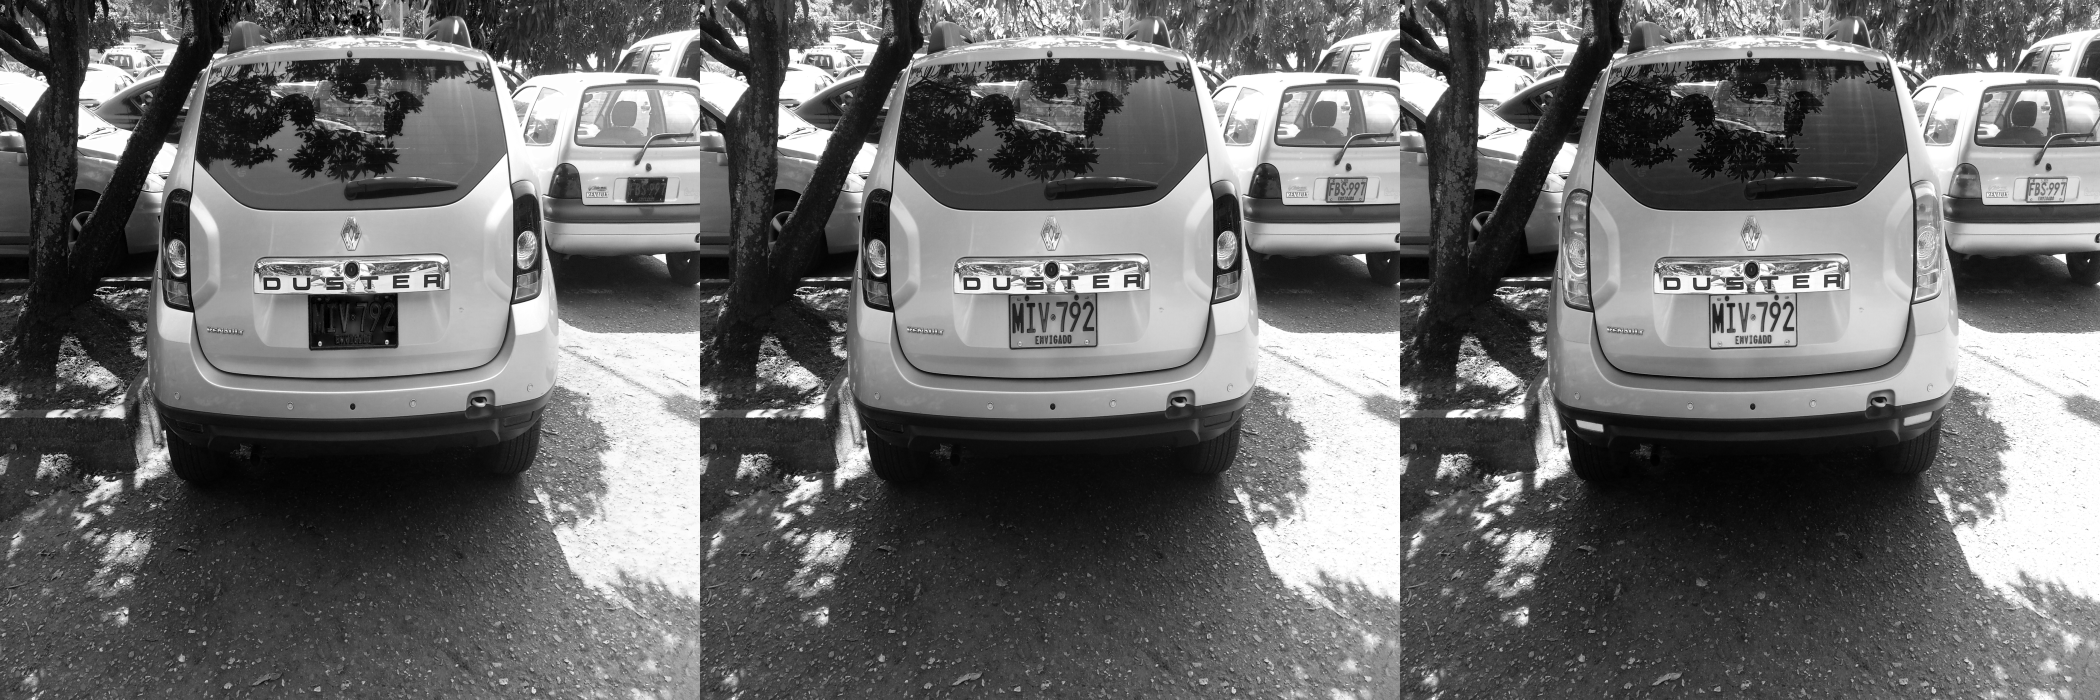

In [0]:
cv2_imshow(a1_chori)

**COMPONENTES HSV**

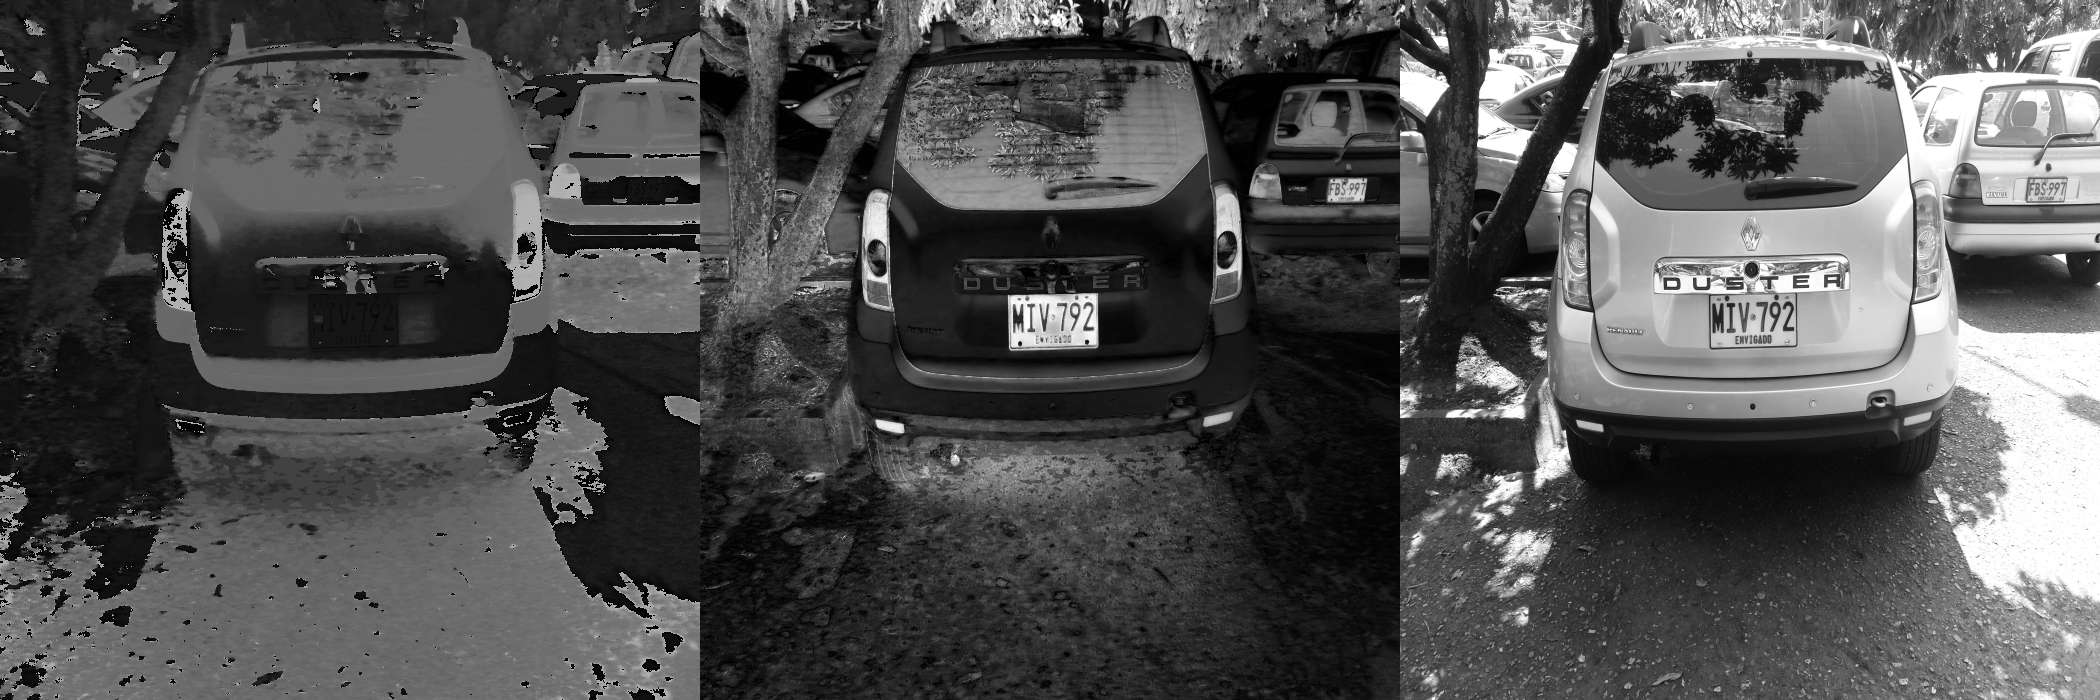

In [0]:
cv2_imshow(a2_chori)

**COMPONENTES LAB**

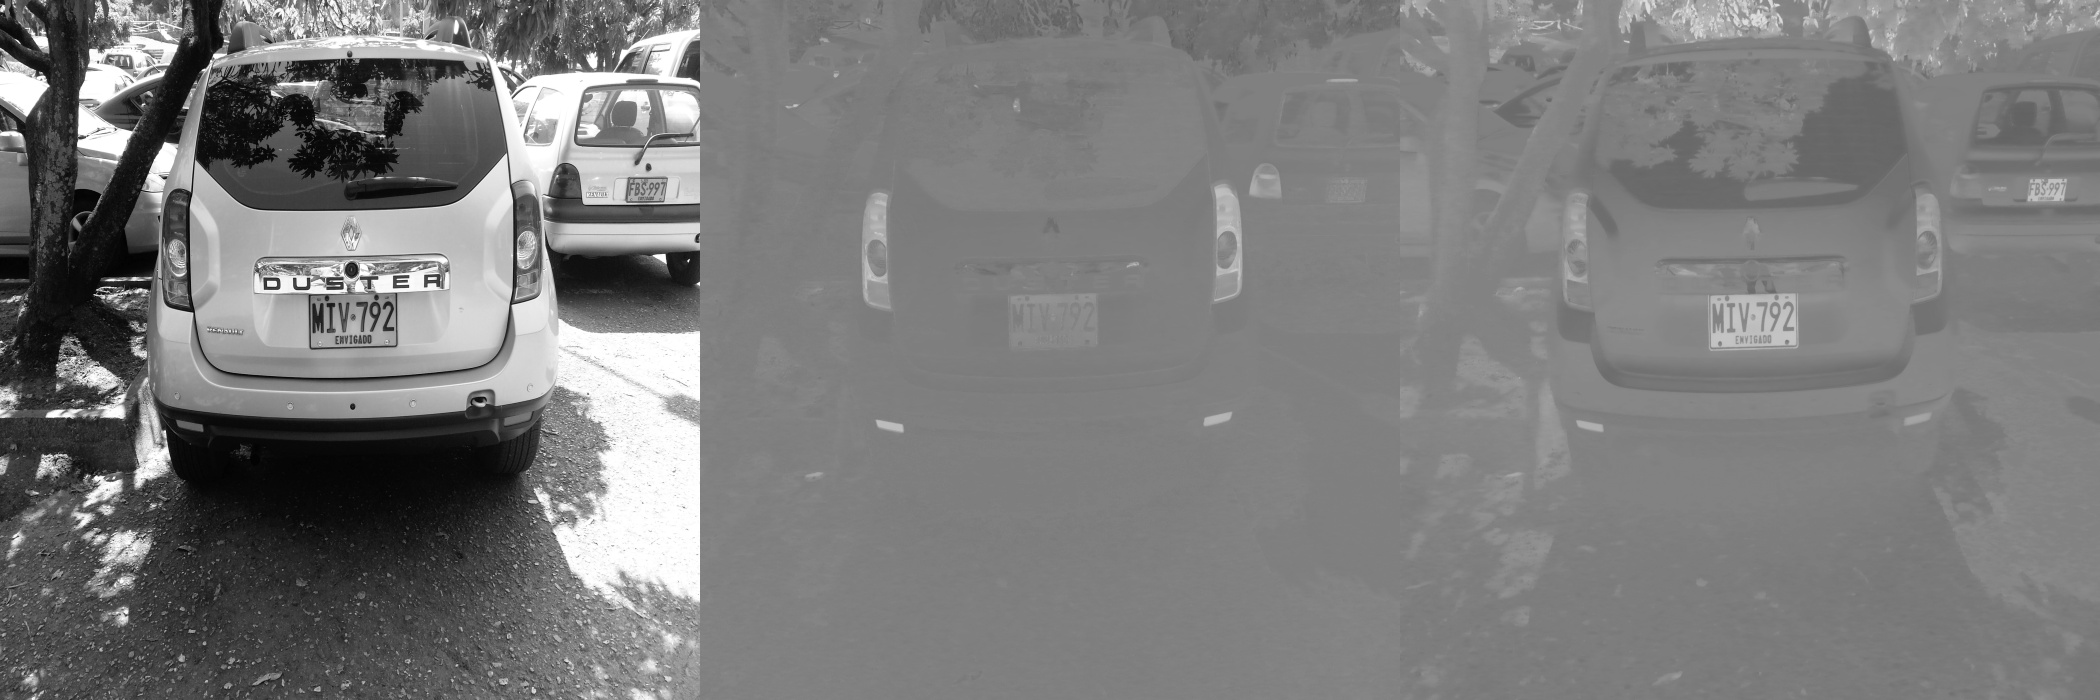

In [0]:
cv2_imshow(a3_chori)

**COMPONENTES CMYK**

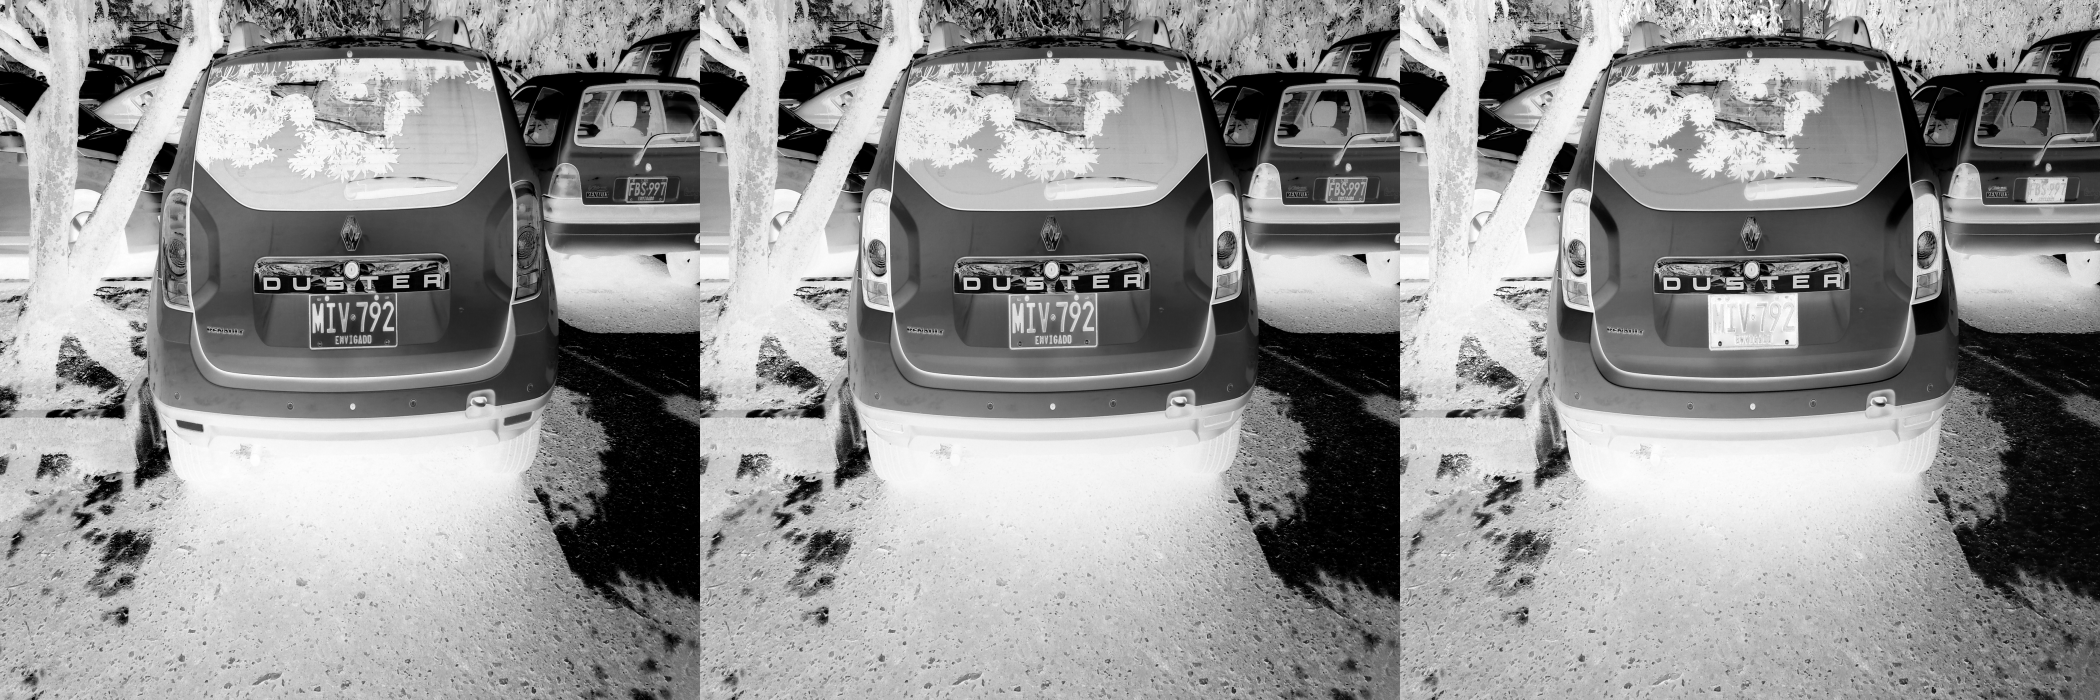

In [0]:
cv2_imshow(a4)

## PARTE 2 SACAR LA PLACA

Luego de visualizar todas las imagenes, se nota a leguas que la placa se visualiza mejor en el formato CMYK en la componente 3
en el archivo selectLicensePlate.py se usara es mejor imagen para resaltar la placa.

In [0]:

#la mejor capa del formato del color por modelo
best_lab =a3[:,:,2]
best_hsv = a2[:,:,1]
best_cmyk = cmyk_image_resize[:,:,0]
#normalizamos las mejores capas por formato de color
cv2.normalize(best_lab, None, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(best_hsv, None, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(best_cmyk, None, 0, 255, cv2.NORM_MINMAX)

array([[228, 229, 225, ..., 166, 149,  97],
       [230, 233, 234, ..., 166, 139, 171],
       [230, 232, 232, ..., 164, 164, 181],
       ...,
       [189, 187, 188, ..., 143, 136, 135],
       [190, 189, 189, ..., 137, 139, 131],
       [192, 190, 190, ..., 132, 141, 130]], dtype=uint8)

**MEJORES**

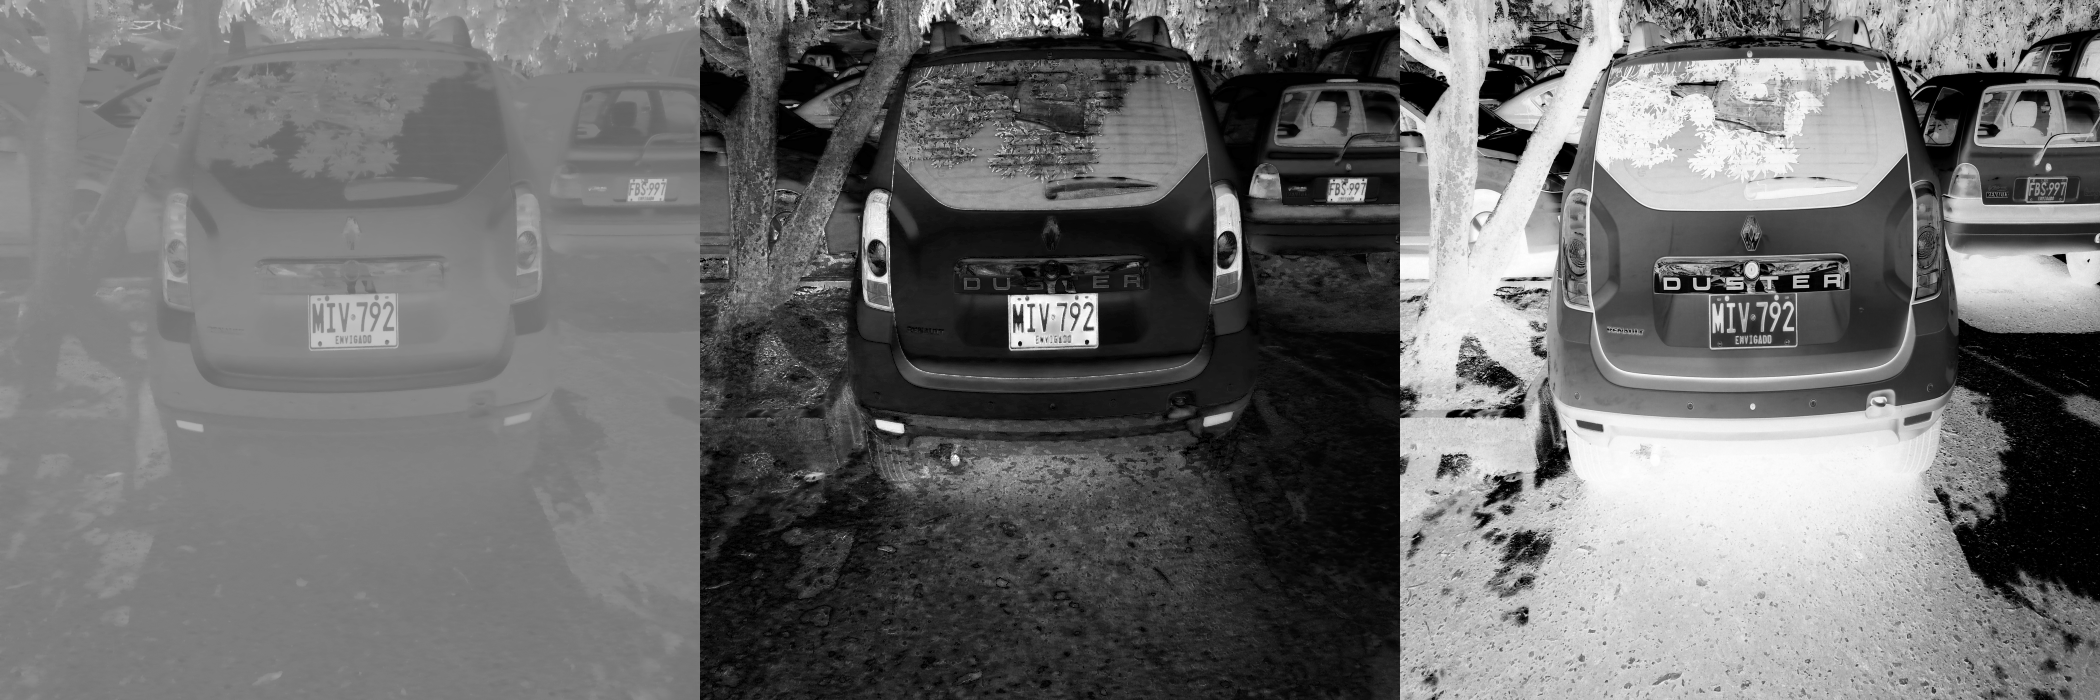

In [0]:
cv2_imshow(np.hstack([best_lab,best_hsv,best_cmyk]))

# Usamos el método de segmentación más simple.
ret, mask  = cv2.threshold(best_lab,0,255,cv2.THRESH_OTSU)
kernel = np.ones((5,3),np.uint8)
mask = cv2.erode(mask,kernel,iterations = 1)

PLACA BINARIZADA

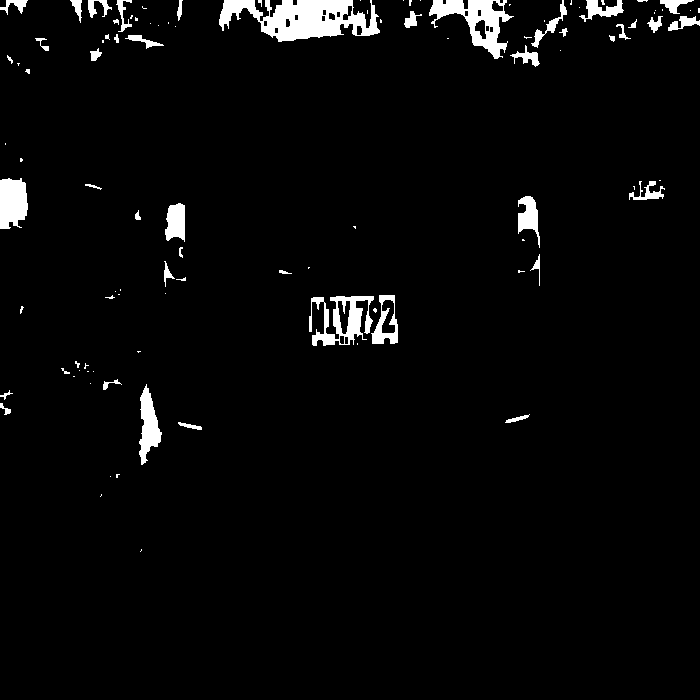

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
cv2_imshow(mask)

#sacamos la placa de la imagen original
b2=cv2.resize(mask,(mask.shape[0],mask.shape[0]),interpolation=cv2.INTER_AREA)
cv2.normalize(b2, None, 0, 255, cv2.NORM_MINMAX)


### ORIGINAL + PLACA

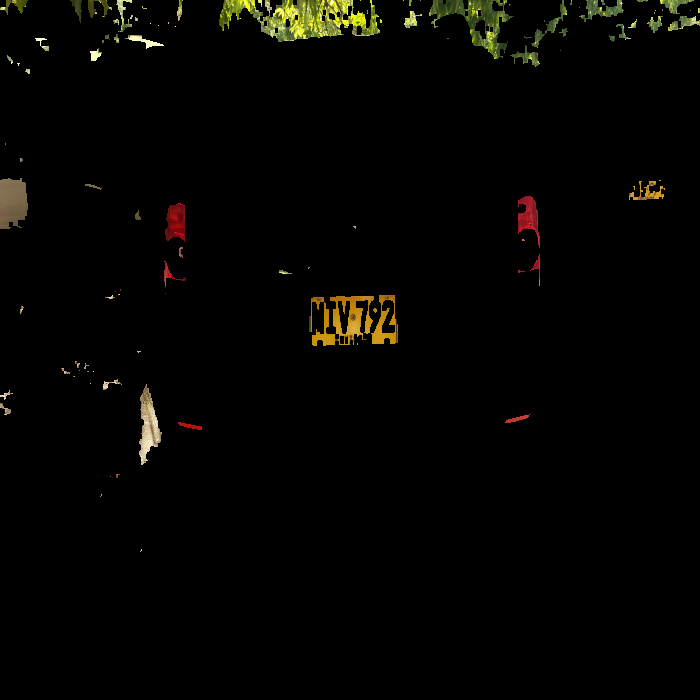

In [0]:
a[b2==0]=0
cv2_imshow(a)